In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "사하구"
region_code = "12"
target_date = "2015-01-15"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("사하구2015_1q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2015-01-15,가루비누,"세탁용세제(LG테크),가루형,3.0kg",8175,사하구,11993,사하구,3818,46.7%,"10,084"
1,2015-01-15,간장,오복왕표 0.9ℓ 1병,6290,사하구,6550,사하구,260,4.13%,"6,420"
2,2015-01-15,달걀,오경슈퍼란60g정도 10개,3290,사하구,3300,사하구,10,0.3%,"3,295"
3,2015-01-15,닭고기,육계 1.0㎏,7522,사하구,8410,사하구,888,11.81%,"7,966"
4,2015-01-15,대파,1.0㎏,2625,사하구,2763,사하구,138,5.26%,"2,694"
5,2015-01-15,돼지고기,삼겹살 500g,9000,사하구,13450,사하구,4450,49.44%,"11,225"
6,2015-01-15,두부,500g 판두부(국산포장두부 420g) 1모,4200,사하구,4200,사하구,0,0.0%,"4,200"
7,2015-01-15,라면,신라면 120g 1봉지,634,사하구,634,사하구,0,0.0%,634
8,2015-01-15,맥주,하이트 500㎖ 1병,1260,사하구,1350,사하구,90,7.14%,"1,305"
9,2015-01-15,무,2.0㎏ 1개,1370,사하구,1394,사하구,24,1.75%,"1,382"


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "사하구"
region_code = "12"
target_date = "2015-04-09"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("사하구2015_2q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2015-04-09,가루비누,"세탁용세제(LG테크),가루형,3.0kg",7425,사하구,11993,사하구,4568,61.52%,"9,709"
1,2015-04-09,간장,오복왕표 0.9ℓ 1병,6290,사하구,6550,사하구,260,4.13%,"6,420"
2,2015-04-09,달걀,오경슈퍼란60g정도 10개,2990,사하구,3300,사하구,310,10.37%,"3,145"
3,2015-04-09,닭고기,육계 1.0㎏,6017,사하구,8410,사하구,2393,39.77%,"7,214"
4,2015-04-09,대파,1.0㎏,2538,사하구,2725,사하구,187,7.37%,"2,632"
5,2015-04-09,돼지고기,삼겹살 500g,8750,사하구,9950,사하구,1200,13.71%,"9,350"
6,2015-04-09,두부,500g 판두부(국산포장두부 420g) 1모,4200,사하구,4200,사하구,0,0.0%,"4,200"
7,2015-04-09,라면,신라면 120g 1봉지,634,사하구,640,사하구,6,0.95%,637
8,2015-04-09,맥주,하이트 500㎖ 1병,1260,사하구,1350,사하구,90,7.14%,"1,305"
9,2015-04-09,무,2.0㎏ 1개,1470,사하구,1517,사하구,47,3.2%,"1,494"


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "사하구"
region_code = "12"
target_date = "2015-07-09"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("사하구2015_3q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2015-07-09,가루비누,"세탁용세제(LG테크),가루형,3.0kg",8175,사하구,9993,사하구,1818,22.24%,"9,084"
1,2015-07-09,간장,오복왕표 0.9ℓ 1병,6290,사하구,6550,사하구,260,4.13%,"6,420"
2,2015-07-09,고등어,30㎝정도 500g 1마리,5365,사하구,5365,사하구,0,0.0%,"5,365"
3,2015-07-09,달걀,오경슈퍼란60g정도 10개,2990,사하구,3000,사하구,10,0.33%,"2,995"
4,2015-07-09,닭고기,육계 1.0㎏,7522,사하구,8410,사하구,888,11.81%,"7,966"
5,2015-07-09,대파,1.0㎏,3525,사하구,4217,사하구,692,19.63%,"3,871"
6,2015-07-09,돼지고기,삼겹살 500g,11950,사하구,13500,사하구,1550,12.97%,"12,725"
7,2015-07-09,두부,500g 판두부(국산포장두부 420g) 1모,4200,사하구,4200,사하구,0,0.0%,"4,200"
8,2015-07-09,라면,신라면 120g 1봉지,634,사하구,640,사하구,6,0.95%,637
9,2015-07-09,맥주,하이트 500㎖ 1병,1260,사하구,1350,사하구,90,7.14%,"1,305"


In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "사하구"
region_code = "12"
target_date = "2015-10-08"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("사하구2015_4q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2015-10-08,가루비누,"세탁용세제(LG테크),가루형,3.0kg",7490,사하구,8175,사하구,685,9.15%,"7,833"
1,2015-10-08,간장,오복왕표 0.9ℓ 1병,6290,사하구,6290,사하구,0,0.0%,"6,290"
2,2015-10-08,고등어,30㎝정도 500g 1마리,3030,사하구,4865,사하구,1835,60.56%,"3,948"
3,2015-10-08,달걀,오경슈퍼란60g정도 10개,2990,사하구,3000,사하구,10,0.33%,"2,995"
4,2015-10-08,닭고기,육계 1.0㎏,5752,사하구,6990,사하구,1238,21.52%,"6,371"
5,2015-10-08,대파,1.0㎏,3692,사하구,3875,사하구,183,4.96%,"3,784"
6,2015-10-08,돼지고기,삼겹살 500g,7500,사하구,9450,사하구,1950,26.0%,"8,475"
7,2015-10-08,두부,500g 판두부(국산포장두부 420g) 1모,4200,사하구,4200,사하구,0,0.0%,"4,200"
8,2015-10-08,라면,신라면 120g 1봉지,634,사하구,634,사하구,0,0.0%,634
9,2015-10-08,맥주,하이트 500㎖ 1병,1260,사하구,1350,사하구,90,7.14%,"1,305"


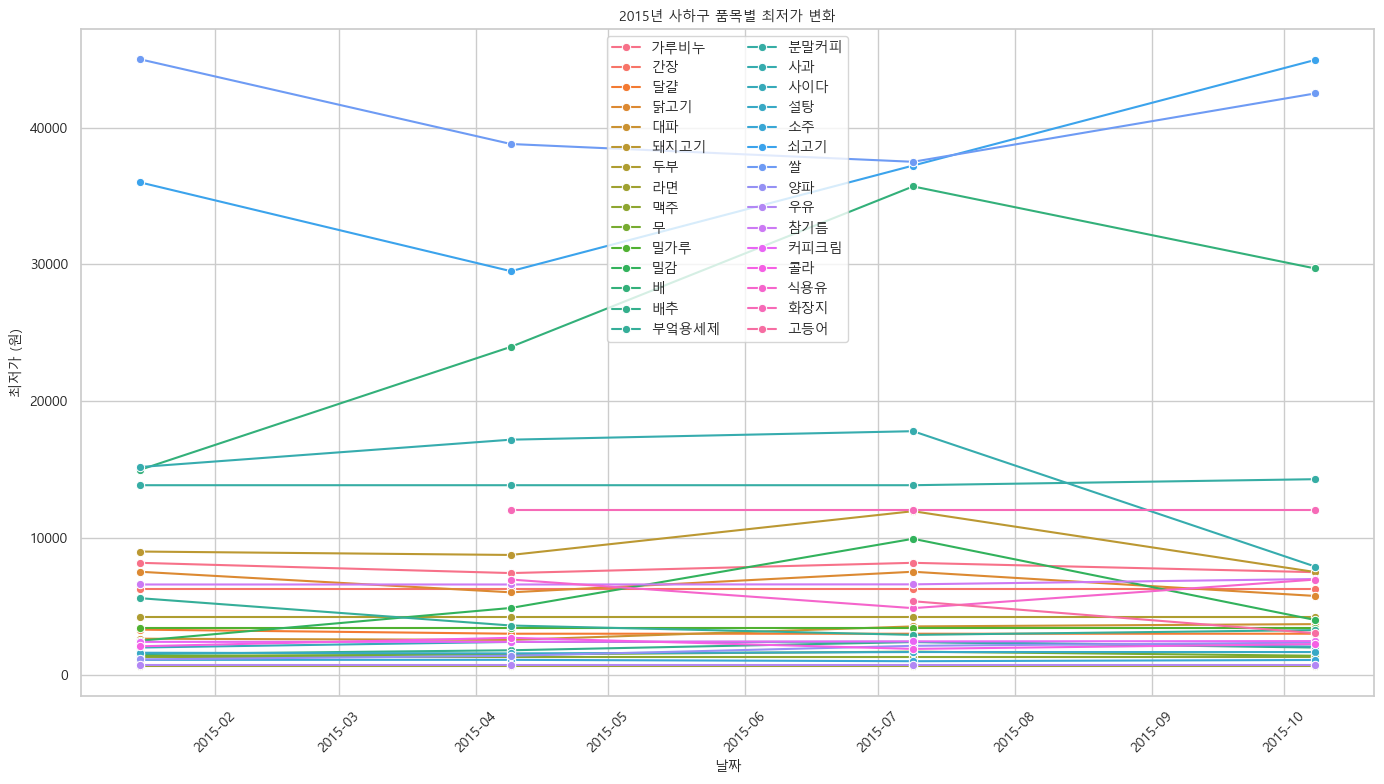

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("사하구2015_1q.csv")
q2 = pd.read_csv("사하구2015_2q.csv")
q3 = pd.read_csv("사하구2015_3q.csv")
q4 = pd.read_csv("사하구2015_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최저가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2015년 사하구 품목별 최저가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최저가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()


# df_all을 저장하는 코드
df_all.to_csv("사하구2015_min.csv", index=False, encoding="utf-8-sig")

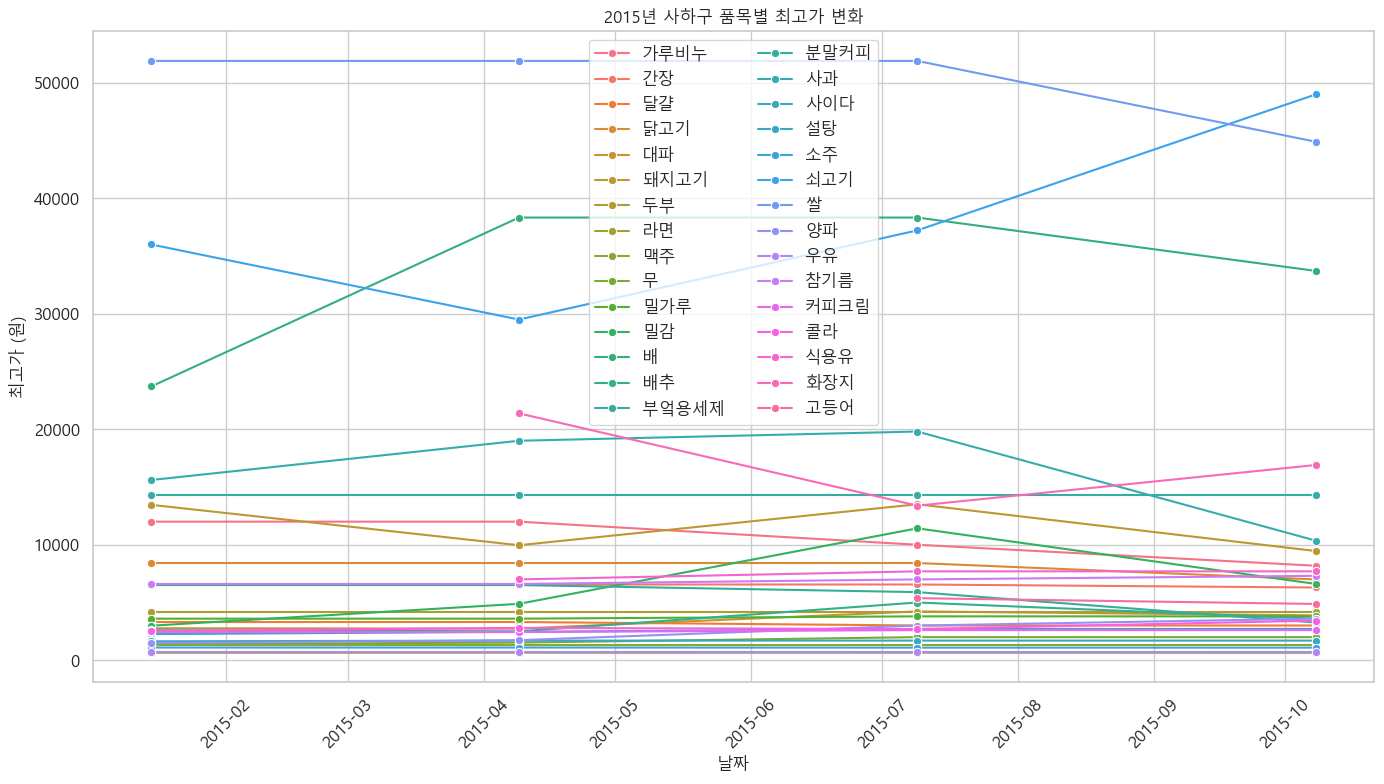

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("사하구2015_1q.csv")
q2 = pd.read_csv("사하구2015_2q.csv")
q3 = pd.read_csv("사하구2015_3q.csv")
q4 = pd.read_csv("사하구2015_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최고가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2015년 사하구 품목별 최고가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최고가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()

# df_all을 저장하는 코드
df_all.to_csv("사하구2015_max.csv", index=False, encoding="utf-8-sig")